# Аппроксимация функции

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt

In [2]:
def print_to_file(value, filename):  
    print(value)
    with open(filename, "w") as file:
        file.write(str(value))

Рассмотрим сложную математическую функцию на отрезке $[1, 15]$:
$$f(x) = sin(\frac{x}{5}) * exp(\frac{x}{10}) + 5 * exp(\frac{-x}{2})$$

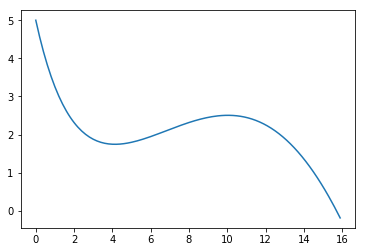

In [3]:
x = np.arange(0, 16, 0.1).reshape(-1,1)
y = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
plt.plot(x,y)
plt.show()

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть $w_0 + w_1 x + w_2 x^2 + ... + w_n x^n$) однозначно определяется любыми $n + 1$ различными точками, через которые он проходит. Это значит, что его коэффициенты $w_0, ... w_n$ можно определить из следующей системы линейных уравнений:

\begin{equation*} 
 \begin{cases}
   w_0 + w_1 x + w_2 x^2_1 + ... + w_n x^n_1 = f(x_1)\\
   w_0 + w_1 x_{n+1} + w_2 x^2_{n+1} + ... + w_n x^n_{n+1} = f(x_{n+1})
 \end{cases}
\end{equation*}

где через $x_1, ..., x_n, x_{n+1}$ обозначены точки, через которые проходит многочлен, а через $f(x_1), ..., f(x_n), f(x_{n+1})$ — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.
## Задание 1
Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией $f$ в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию $f$ и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [4]:
#подаем на вход лишь списко иксов без возведения в степень
def solve_and_plot(a):
    count = len(a)
    powers_vec = np.arange(0,count).reshape(-1,1)
    powers_matrix = np.repeat(powers_vec, count, axis=1)
    A = np.power(a, powers_matrix).T
    y_func = lambda x: np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
    b = y_func(A[:,1])
    
    coef = np.linalg.solve(A, b)
    coef = coef[::-1]
    print('Коэффициенты многочлена', count-1, 'степени равны', coef)
    print('Полученный многочлен')
    print(np.poly1d(coef))
    
    x = np.arange(0, 16, 0.1)
    y = np.polyval(coef, x)
    plt.plot(x,y)
    plt.show()
    return coef[::-1]

Коэффициенты многочлена 1 степени равны [-0.18692825  3.43914511]
Полученный многочлен
 
-0.1869 x + 3.439


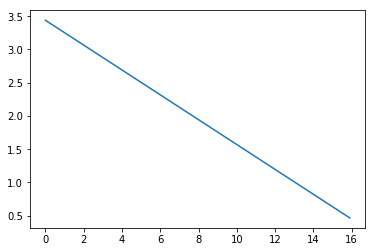

array([ 3.43914511, -0.18692825])

In [5]:
a_2 = np.array([1,15])
solve_and_plot(a_2)

Данный многочлен плохо приближает функцию.
## Задание 2
Повторите те же шаги для многочлена второй степени, который совпадает с функцией $f$ в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

Коэффициенты многочлена 2 степени равны [-0.00760104 -0.06531159  3.32512949]
Полученный многочлен
           2
-0.007601 x - 0.06531 x + 3.325


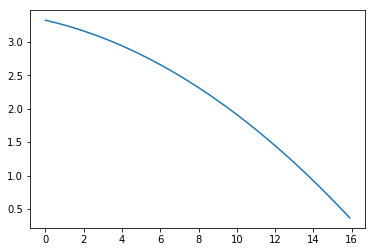

array([ 3.32512949, -0.06531159, -0.00760104])

In [6]:
a_3 = np.array([1,8,15])
solve_and_plot(a_3)

Данный многочлен плохо приближает функцию.
## Задание 3
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией $f$ в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: $w_0, w_1, w_2, w_3$) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

Коэффициенты многочлена 3 степени равны [-0.00823565  0.19333685 -1.29552587  4.36264154]
Полученный многочлен
           3          2
-0.008236 x + 0.1933 x - 1.296 x + 4.363


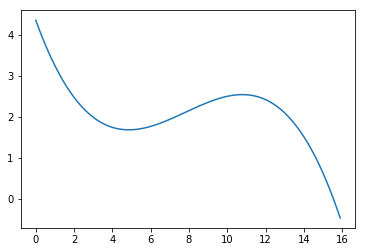

In [7]:
a_4 = np.array([1,4,10,15])
solution_4 = solve_and_plot(a_4)

Данный многочлен хорошо приближает функцию.
## Задание 3
Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [8]:
array_to_str = ' '.join(solution_4.astype(str))
print_to_file(array_to_str,"submission-2.txt")

4.362641535118072 -1.2955258656948436 0.1933368470215116 -0.008235651173320552
